In [1]:
import numpy as np
import h5py
from tools.tools import *
from matplotlib import pyplot as plt 
import pandas as pd
import random as rand
from scipy.stats import zscore
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pyeeg

In [2]:
h5_datas = h5py.File("../ml_project_data/h5/X_train.h5/X_train.h5","r")
labels = pd.read_csv('../ml_project_data/h5/y_train.csv').values[:,1]

In [3]:
#dirty name for train and test set 
X_train, X_test, y_train, y_test = pick_train_test(7000,labels)
eeg_train = np.transpose(record_eeg(X_train,h5_datas),(1,0,2))
eeg_test = np.transpose(record_eeg(X_test,h5_datas),(1,0,2))

In [4]:
X_train

array([ 3018,  6157,  7184, ...,  6675,  6124, 17520])

In [5]:
treated_X_train = treat_samples_map(eeg_train,treat_record_wpt)
treated_X_test = treat_samples_map(eeg_test,treat_record_wpt)

In [6]:
treated_X_train.shape

(5250, 56)

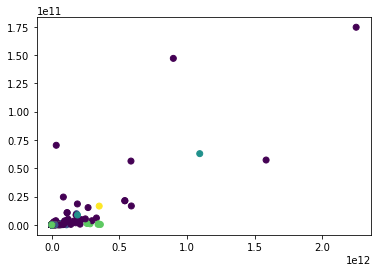

In [7]:
plt.scatter(treated_X_train[:,0],treated_X_train[:,1],c=y_train)

# Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(treated_X_train, y_train)

RandomForestClassifier(n_estimators=1000)

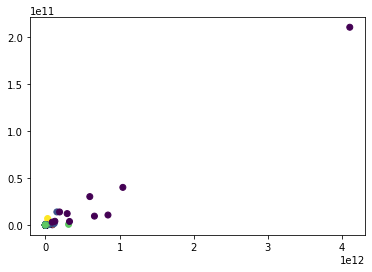

In [10]:
plt.scatter(treated_X_test[:,0],treated_X_test[:,1],c=y_test)

In [11]:
f1_score(y_test,clf.predict(treated_X_test),average="macro")

0.6992824366536748

# LightGBM

In [12]:
lgb.LGBMClassifier?

Object `lgb.LGBMClassifier` not found.


In [13]:
import lightgbm as lgb
# model = lgb.LGBMClassifier(reg_lambda=10, n_estimators=10000)
model = lgb.LGBMClassifier()
model.fit(treated_X_train,y_train)

LGBMClassifier()

In [14]:
f1_score(y_test,model.predict(treated_X_test),average="macro")

0.7018076164935533

In [18]:
model.feature_importances_

array([356, 443, 226, 187, 350, 239, 287, 295, 294, 325, 244, 225, 317,
       215, 214, 176, 260, 258, 233, 189, 292, 202, 312, 189, 357, 328,
       258, 277, 323, 324, 357, 248, 344, 380, 263, 203, 287, 202, 204,
       230, 334, 289, 186, 209, 348, 241, 289, 158, 325, 303, 199, 223,
       270, 217, 268, 228], dtype=int32)

In [19]:
np.argsort(model.feature_importances_)

array([47, 15, 42,  3, 23, 19, 50, 37, 21, 35, 38, 43, 14, 13, 53, 51, 11,
        2, 55, 39, 18,  5, 45, 10, 31, 17, 26, 16, 34, 54, 52, 27,  6, 36,
       41, 46, 20,  8,  7, 49, 22, 12, 28, 29, 48,  9, 25, 40, 32, 44,  4,
        0, 30, 24, 33,  1])